# <center> Program to analyze and find salary of a job profile

I wrote this program so that it can scrape and analyze several jobs listed on Indeed.com or Indeed.ca in this case since I am in Canada and find the average salary of jobs. In addition to this, it also tells us which city in Canada has the maximum number of jobs and maximum salary. I have plotted all this using bar graph to make it visually easy to understand.

 Let's start by asking the user which job title he wants search for. First, we create a variable called <b> *job_title_1*</b> and store the user input in it

In [125]:
job_title_1 = input("Enter the Job Title: ")

Enter the Job Title: Data Scientist


#### Now let's import the required libries

In [126]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


The way Indeed works is it takes the given user input, converts it to lower case and replaces the spaces with +. So we need to do the same.

Let's convert the job title to lower case using <b>.lower()</b> method.

Then, let's replace the spaces with + using <b>.repalce()</b> method.

And then let's see how the output looks, <b>job_title_3</b> in this case.

In [127]:
job_title_2 = job_title_1.lower() # convert to lower case
job_title_3 = job_title_2.replace(' ', '+') # replace space with +
job_title_3

'data+scientist'

In our case, since we are searching for <b>Data Scientist</b> the output looks good, <b>*data+scientist*</b>

Now let's write the code that can scrape Indeed.ca with our <b>*job_title_3*</b>

Here we insert job_title_3 into our url using concatenate feature in python

In [128]:
url = 'https://www.indeed.ca/jobs?q='+job_title_3+'&l=canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/21a665b/en_CA.js" type="text/javascript">
  </script>
  <link href="/s/97464e7/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://www.indeed.ca/rss?q=data+scientist&amp;l=canada" rel="alternate" title="Data Scientist Jobs in Canada" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+scientist&amp;l=canada&amp;limit=20" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="/m/jobs?q=data+scientist&amp;l=canada&amp;limit=20" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
  </script>

In [129]:
url

'https://www.indeed.ca/jobs?q=data+scientist&l=canada'

Now that we have the the url, let's write a function that will parse the url, extract the data and store it in a dataframe.

In order to get a proper data set, we need to parse more than one page. So let's write the code to parse first 10 pages and store them in the same dataframe using <b>pd.concat</b> function.

In [130]:
def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary", "Synopsis"])
    for each in soup.find_all(class_= "result" ):
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text
        except:
            salary = 'None'
        synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary, 'Synopsis':synopsis}, ignore_index=True)
    return df
df1 = parse(url)
url_1 = url + "&start=20"
url_2 = url + "&start=40"
url_3 = url + "&start=60"
url_4 = url + "&start=80"
url_5 = url + "&start=100"
url_6 = url + "&start=120"
url_7 = url + "&start=140"
url_8 = url + "&start=160"
url_9 = url + "&start=180"
url_10 = url + "&start=200"

df2 = parse(url_1)
df3 = parse(url_2)
df4 = parse(url_3)
df5 = parse(url_4)
df6 = parse(url_5)
df7 = parse(url_6)
df8 = parse(url_7)
df9 = parse(url_8)
df10 = parse(url_9)
df11 = parse(url_10)

data1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data1

,Title,Location,Company,Salary,Synopsis
0,Data Scientist,None,MSi Corp.,None,Develop custom dat...
1,Data Scientist,None,"Quietly Media, Inc.",None,Assist with settin...
2,Data Scientist,None,SPORTLOGiQ,None,As a Data Scientis...
3,Data Scientists and Statisticians,None,Genome Canada Transplant Consortium,None,Data Scientists / Biostatistician. Implement a...
4,Data Scientist I,"Toronto, ON",TD Bank,None,Tell us your story. Don't go unnot...
5,Full-time opportunities for students & recent ...,Canada,Microsoft,None,"As a Data Scientist, you will form..."
6,Senior Quantitive and Data Scientist Analyst,"Toronto, ON",TD Bank,None,Tell us your story. Don't go unnot...
7,Data Scientist,"Calgary, AB",ExxonMobil,None,"As a Data Scientist, you will:. Wo..."
8,Video Game Data Scientist,"London, ON",Digital Extremes Ltd.,None,"Architect, implement, deploy, and ..."
9,Data Scientist - Algorithm Developer,"Calgary, AB",Baker Hughes,None,Baker Hughes Incorporated has an o...


In [131]:
data1.shape

(290, 5)

Once we have the dataset, we can see that it has a lot of stuff that we don't need like \n, $ etc. So let's clean up the data.

When we check the data type of data1, we can see that <b>Salary</b> is stored as an object. In addition to that, Salary is defined as per year, per month, per week and per hour. In order for our analysis to work, we need to have salary displayed as per year and the column salary itself should be either <b>*float*</b> or <b>*int*</b>.

In [132]:
data1.dtypes # here, salary is an object

Title       object
Location    object
Company     object
Salary      object
Synopsis    object
dtype: object

In [133]:
data_sal_year_temp = data1[data1['Salary'].str.contains(' a year')].reset_index(drop=True)
data_sal_year_1a = data_sal_year_temp.replace(' a year', '', regex=True) # replace 'a year'
data_sal_year_1 = data_sal_year_1a.replace('\n', '', regex=True) # replace \n
data_sal_year_2 = data_sal_year_1.replace('[\$,)]', '', regex=True) # replace $
data_sal_year_3a = data_sal_year_2['Salary'].str.split('-', expand=True)
data_sal_year_3a.iloc[:, :] = data_sal_year_3a.iloc[:, :].astype('float')
data_sal_year_3b = data_sal_year_3a.sum(axis=1).astype('float')
data_sal_year_3c = (data_sal_year_3b/2)
data_sal_year_3 = data_sal_year_3c.astype('int')
data_sal_year_5 = pd.concat([data_sal_year_2, data_sal_year_3], axis=1, sort=True)
data_sal_year_6 = data_sal_year_5.drop(['Salary'], axis=1)

This segment takes the salary per month and converts it to per year

In [134]:
data_sal_month_temp = data1[data1['Salary'].str.contains(' a month')].reset_index(drop=True)
data_sal_month_1a = data_sal_month_temp.replace(' a month', '', regex=True)
data_sal_month_1 = data_sal_month_1a.replace('\n', '', regex=True)
data_sal_month_2 = data_sal_month_1.replace('[\$,)]', '', regex=True)
data_sal_month_3a = data_sal_month_2['Salary'].str.split('-', expand=True)
data_sal_month_3a.iloc[:, :] = data_sal_month_3a.iloc[:, :].astype('float')
data_sal_month_3b = data_sal_month_3a.sum(axis=1).astype('float')
data_sal_month_3c = (data_sal_month_3b/2) * 12
data_sal_month_3 = data_sal_month_3c.astype('int')
data_sal_month_5 = pd.concat([data_sal_month_2, data_sal_month_3], axis=1, sort=True)
data_sal_month_6 = data_sal_month_5.drop(['Salary'], axis=1)

This segment takes the salary per week and converts it to per year

In [135]:
data_sal_week_temp = data1[data1['Salary'].str.contains(' a week')].reset_index(drop=True)
data_sal_week_1a = data_sal_week_temp.replace(' a week', '', regex=True)
data_sal_week_1 = data_sal_week_1a.replace('\n', '', regex=True)
data_sal_week_2 = data_sal_week_1.replace('[\$,)]', '', regex=True)
data_sal_week_3a = data_sal_week_2['Salary'].str.split('-', expand=True)
data_sal_week_3a.iloc[:, :] = data_sal_week_3a.iloc[:, :].astype('float')
data_sal_week_3b = data_sal_week_3a.sum(axis=1).astype('float')
data_sal_week_3c = (data_sal_week_3b/2) * 52
data_sal_week_3 = data_sal_week_3c.astype('int')
data_sal_week_5 = pd.concat([data_sal_week_2, data_sal_week_3], axis=1, sort=True)
data_sal_week_6 = data_sal_week_5.drop(['Salary'], axis=1)

This segment takes the salary per hour and converts it to per year

In [136]:
data_sal_hour_temp = data1[data1['Salary'].str.contains(' an hour')].reset_index(drop=True)
data_sal_hour_1a = data_sal_hour_temp.replace(' an hour', '', regex=True)
data_sal_hour_1 = data_sal_hour_1a.replace('\n', '', regex=True)
data_sal_hour_2 = data_sal_hour_1.replace('[\$,)]', '', regex=True)
data_sal_hour_3a = data_sal_hour_2['Salary'].str.split('-', expand=True)
data_sal_hour_3a.iloc[:, :] = data_sal_hour_3a.iloc[:, :].astype('float')
data_sal_hour_3b = data_sal_hour_3a.sum(axis=1).astype('float')
data_sal_hour_3c = (data_sal_hour_3b/2) * 40 * 52
data_sal_hour_3 = data_sal_hour_3c.astype('int')
data_sal_hour_5 = pd.concat([data_sal_hour_2, data_sal_hour_3], axis=1, sort=True)
data_sal_hour_6 = data_sal_hour_5.drop(['Salary'], axis=1)

Let's sort the rows that don't have any salary mentioned and save them in <b>data_sal_none_temp</b>

In [137]:
data_sal_none_temp = data1[data1['Salary'].str.contains('None')].reset_index(drop=True)
data_sal_none_temp.head()

,Title,Location,Company,Salary,Synopsis
0,Data Scientist,None,MSi Corp.,None,Develop custom dat...
1,Data Scientist,None,"Quietly Media, Inc.",None,Assist with settin...
2,Data Scientist,None,SPORTLOGiQ,None,As a Data Scientis...
3,Data Scientists and Statisticians,None,Genome Canada Transplant Consortium,None,Data Scientists / Biostatistician. Implement a...
4,Data Scientist I,"Toronto, ON",TD Bank,None,Tell us your story. Don't go unnot...


Now let's bring together our newly formed dataset and save it as <b>data_sal_all</b> and rename the table header as <b>Title</b>, <b>Location</b>, <b>Company</b>, <b>Synopsis</b> and <b>Salary</b>

In [138]:
data_sal_all = pd.concat([data_sal_year_6, data_sal_month_6, data_sal_week_6, data_sal_hour_6], axis=0, sort=True)
data_sal_all.columns = ['Title', 'Location', 'Company', 'Synopsis', 'Salary']
data_sal_all.sort_values(by='Salary',ascending=True, inplace=True)
data_sal_all.head()

,Title,Location,Company,Synopsis,Salary
1,WILDLIFE RESEARCH INTERN,Peterborough ON,Ministry of Natural Resources and Fore...,Experience using databases to ente...,29952
0,WILDLIFE RESEARCH INTERN,Peterborough ON,Ministry of Natural Resources and Fore...,Experience using databases to ente...,29952
2,Data Scientist,Edmonton AB,Nanoprecise Sci Corp,Experience in data-centric problem...,35000
5,Senior Data Scientist,Kitchener ON,Acerta Analytics Solutions Inc,Come join our data science team an...,40000
0,Senior Data Scientist,Waterloo ON,Acerta Analytics Solutions,Come join our data science team an...,45000


Now, let's join the two data sets, <b>data_sal_all</b> and <b>data_sal_none_temp</b> and save them in <b>data_sal_all_1</b>

In [139]:
data_sal_all_1 = pd.concat([data_sal_all, data_sal_none_temp], axis=0, sort=True)
data_sal_all_1.head()

,Company,Location,Salary,Synopsis,Title
1,Ministry of Natural Resources and Fore...,Peterborough ON,29952,Experience using databases to ente...,WILDLIFE RESEARCH INTERN
0,Ministry of Natural Resources and Fore...,Peterborough ON,29952,Experience using databases to ente...,WILDLIFE RESEARCH INTERN
2,Nanoprecise Sci Corp,Edmonton AB,35000,Experience in data-centric problem...,Data Scientist
5,Acerta Analytics Solutions Inc,Kitchener ON,40000,Come join our data science team an...,Senior Data Scientist
0,Acerta Analytics Solutions,Waterloo ON,45000,Come join our data science team an...,Senior Data Scientist


Let's see the shape of <b>data_sal_all_1</b>

In [140]:
data_sal_all_1.shape

(290, 5)

The shape of <b>data_sal_all_1</b> is <b>(283, 5)</b> which is same as the shape of <b>data1</b>.
This proves that we successfully managed to merge the 2 datasets without missing any row.

Now let's replace <b>'None'</b> values with <b>np.nan</b> and change the data type of <b>Salary</b> to *float*

In [141]:
data5a = data_sal_all_1.replace('None',np.nan, regex=True)
data5a['Salary'].astype('float')

1       29952.0
0       29952.0
2       35000.0
5       40000.0
0       45000.0
12      50000.0
3       51000.0
0       57200.0
17      60000.0
15      60000.0
2       64480.0
1       74022.0
11      75000.0
10      76123.0
0       78000.0
1       80000.0
4       85000.0
8       85000.0
16      87112.0
18      87500.0
19      90892.0
20      90892.0
6       98649.0
14     102500.0
13     105505.0
9      125000.0
7      130000.0
1      156000.0
0           NaN
1           NaN
         ...   
232         NaN
233         NaN
234         NaN
235         NaN
236         NaN
237         NaN
238         NaN
239         NaN
240         NaN
241         NaN
242         NaN
243         NaN
244         NaN
245         NaN
246         NaN
247         NaN
248         NaN
249         NaN
250         NaN
251         NaN
252         NaN
253         NaN
254         NaN
255         NaN
256         NaN
257         NaN
258         NaN
259         NaN
260         NaN
261         NaN
Name: Salary, Length: 29

Now, let's find the mean of the the cell Sa;ary using the .mean() method

In [142]:
mean_1 = data5a['Salary'].mean()
mean_1

76777.82142857143

We can now replace the np.nan cells with the mean salary obtained in the previous step.

Let's also change the datatype to *int*

In [143]:
data5b = data5a['Salary'].replace(np.nan, mean_1)
data5ba = data5b.astype('int')

Let's concact this salary to our previous dataframe <b>data_sal_all_1</b>

In [144]:
data5c = pd.concat([data_sal_all_1, data5ba], axis=1)
data5c.reset_index()

,index,Company,Location,Salary,Synopsis,Title,Salary
0,1,Ministry of Natural Resources and Fore...,Peterborough ON,29952,Experience using databases to ente...,WILDLIFE RESEARCH INTERN,29952
1,0,Ministry of Natural Resources and Fore...,Peterborough ON,29952,Experience using databases to ente...,WILDLIFE RESEARCH INTERN,29952
2,2,Nanoprecise Sci Corp,Edmonton AB,35000,Experience in data-centric problem...,Data Scientist,35000
3,5,Acerta Analytics Solutions Inc,Kitchener ON,40000,Come join our data science team an...,Senior Data Scientist,40000
4,0,Acerta Analytics Solutions,Waterloo ON,45000,Come join our data science team an...,Senior Data Scientist,45000
5,12,INTELLIGENT MECHATRONIC (Part of Trak ...,Waterloo ON,50000,As a Data Scientist you value coll...,Data Scientist,50000
6,3,Ryerson University,Toronto ON,51000,An open position for a data scient...,Data scientist in Computer Vision and Deep Lea...,51000
7,0,OptionTrain College of Management and ...,Toronto ON,57200,Data Import And Data Export. Basic Data Types....,Data Scientist Instructor,57200
8,17,FIND Innovation Labs Inc.,Vancouver BC,60000,FIND Innovation Labs is seeking a ...,Mitacs Intern - Data Scientist,60000
9,15,FIND Innovation Labs Inc.,Vancouver BC,60000,FIND Innovation Labs is seeking a ...,Mitacs Intern - Data Scientist,60000


Now we have two Salary columns in our dataframe, so we rename the old one to Salary_1 and drop it.

In [145]:
data5c.columns = ['Company', 'Location', 'Salary_1', 'Synopsis', 'Title', 'Salary']
data5d = data5c.drop(['Salary_1'], axis=1)
data5d.head()

,Company,Location,Synopsis,Title,Salary
1,Ministry of Natural Resources and Fore...,Peterborough ON,Experience using databases to ente...,WILDLIFE RESEARCH INTERN,29952
0,Ministry of Natural Resources and Fore...,Peterborough ON,Experience using databases to ente...,WILDLIFE RESEARCH INTERN,29952
2,Nanoprecise Sci Corp,Edmonton AB,Experience in data-centric problem...,Data Scientist,35000
5,Acerta Analytics Solutions Inc,Kitchener ON,Come join our data science team an...,Senior Data Scientist,40000
0,Acerta Analytics Solutions,Waterloo ON,Come join our data science team an...,Senior Data Scientist,45000


Let's procede with the cleanup of our dataset. Let's drop the cells that don't have any location as it won't be useful to us in our analysis.

In [146]:
data6a = data5d.replace('None',np.nan, regex=True)
data6 = data6a[pd.notnull(data5d["Location"])]
data6 = data6.reset_index(drop=True)
data7 = data6.groupby('Location').count()
sort_data = data7.sort_values('Title',ascending=False)

In [147]:
sort_data.head(10)

,Company,Synopsis,Title,Salary
Location,,,,
"Toronto, ON",68,68,68,68
"Montréal, QC",29,29,29,29
"Vancouver, BC",18,18,18,18
"Calgary, AB",13,13,13,13
"Ottawa, ON",9,9,9,9
"Waterloo, ON",7,7,7,7
Canada,7,7,7,7
"Mississauga, ON",6,6,6,6
Toronto ON,5,5,5,5


As we can see above, <b>sort_data</b> has a location <b>Canada</b>. We need to drop that row. Since we made our code flexible by asking the user to input his job title, this field might not show up in other job titles. Hence we need to write the code that will check if this field is there, and if it, drop it, else procede without doing anything.

In [148]:
sort_data_canada_1 = sort_data.reset_index()
sort_data_canada_2 = sort_data_canada_1.iloc[:, 0]
sort_data_canada_3 = sort_data_canada_2.isin(['Canada'])

In [149]:
if sort_data_canada_3.any() == True:
    sort_data_1 = sort_data.drop(['Canada'], axis=0)
else:
    sort_data_1 = sort_data

In [150]:
sort_data_2 = sort_data_1.reset_index()
sort_data_2.head()

,Location,Company,Synopsis,Title,Salary
0,"Toronto, ON",68,68,68,68
1,"Montréal, QC",29,29,29,29
2,"Vancouver, BC",18,18,18,18
3,"Calgary, AB",13,13,13,13
4,"Ottawa, ON",9,9,9,9


Now let's split the location into <b>City</b> and <b>Provience</b>

In [151]:
data1 = sort_data_2['Location'].str.split(',', expand=True)
data1.columns = ['City', 'Provience']
data1.head()

,City,Provience
0,Toronto,ON
1,Montréal,QC
2,Vancouver,BC
3,Calgary,AB
4,Ottawa,ON


Now let's merge this new data with the previous data and drop the column <b>Location</b>

In [152]:
data2 = pd.concat([data1, sort_data_2], axis=1, sort=False)
data3 = data2.drop(['Location'], axis=1)
data3.head()

,City,Provience,Company,Synopsis,Title,Salary
0,Toronto,ON,68,68,68,68
1,Montréal,QC,29,29,29,29
2,Vancouver,BC,18,18,18,18
3,Calgary,AB,13,13,13,13
4,Ottawa,ON,9,9,9,9


Let's see which <b>Provience</b> has the maximum number of jobs.

In [153]:
data4 = data3.groupby('Provience')['Title'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data5 = data4['Title'].str.split(',', expand=True)
data5.iloc[:, :] = data5.iloc[:, :].astype(float)
data5['Total'] = data5.sum(axis=1).astype(int)
data8 = data5.loc[:, 'Total']
data9 = data4.loc[:, 'Provience']
data10 = pd.concat([data9, data8], axis=1, sort=True)
data10

,Provience,Total
0,AB,13
1,BC,28
2,MB,2
3,NB,2
4,NS,1
5,ON,103
6,QC,35


Let's sort the dataframe by which <b>City</b> has the maximum number of jobs and arrange it in ascending order.

In [154]:
data11 = sort_data_1
data11.sort_values(by='Title', ascending=True, inplace=True)
data12 = data11.loc[:, 'Title']
data13 = data12.tail(15)
data13

Location
Maple Ridge, BC     3
Québec City QC      3
Oakville ON         3
Vancouver BC        3
London, ON          3
Markham, ON         4
Kitchener, ON       4
Toronto ON          5
Mississauga, ON     6
Waterloo, ON        7
Ottawa, ON          9
Calgary, AB        13
Vancouver, BC      18
Montréal, QC       29
Toronto, ON        68
Name: Title, dtype: int64

Now let's make sure we don't have any duplicated in our dataframe

In [155]:
data5d.drop_duplicates(keep=False,inplace=True)
data5d

,Company,Location,Synopsis,Title,Salary
2,Nanoprecise Sci Corp,Edmonton AB,Experience in data-centric problem...,Data Scientist,35000
5,Acerta Analytics Solutions Inc,Kitchener ON,Come join our data science team an...,Senior Data Scientist,40000
0,Acerta Analytics Solutions,Waterloo ON,Come join our data science team an...,Senior Data Scientist,45000
12,INTELLIGENT MECHATRONIC (Part of Trak ...,Waterloo ON,As a Data Scientist you value coll...,Data Scientist,50000
3,Ryerson University,Toronto ON,An open position for a data scient...,Data scientist in Computer Vision and Deep Lea...,51000
0,OptionTrain College of Management and ...,Toronto ON,Data Import And Data Export. Basic Data Types....,Data Scientist Instructor,57200
2,Resonance Ltd,Barrie ON,Use data analysis tools and techni...,Research Scientist,64480
1,Northern Alberta Institute of Technology,Alberta,COSS is staffed by an expert team ...,Research Associate,74022
11,Corl,Toronto ON,Please only apply if you consider ...,Senior Data Scientist,75000
10,Government of Canada,Ottawa ON,Experience in maintaining accurate...,Conservation Scientist,76123


As we can see, many job titles have the same salary listed. For our last step, data visualization, we don’t need same salaries for different job titles, we just need one. So we group them by salary and then sort them in ascending order.

In [156]:
data5e = data5d.groupby('Salary')['Company'].apply(' '.join).reset_index()
data5e.sort_values(by='Salary', ascending=True, inplace=True)

In [157]:
data_sal_all_1 = data5e.loc[:,'Salary']
data_sal_all_2 = data_sal_all_1.tail(15)
data_sal_all_2

7      74022
8      75000
9      76123
10     76777
11     78000
12     80000
13     85000
14     87112
15     87500
16     98649
17    102500
18    105505
19    125000
20    130000
21    156000
Name: Salary, dtype: int64

Now, let's plot which city has the maximum number of jobs.

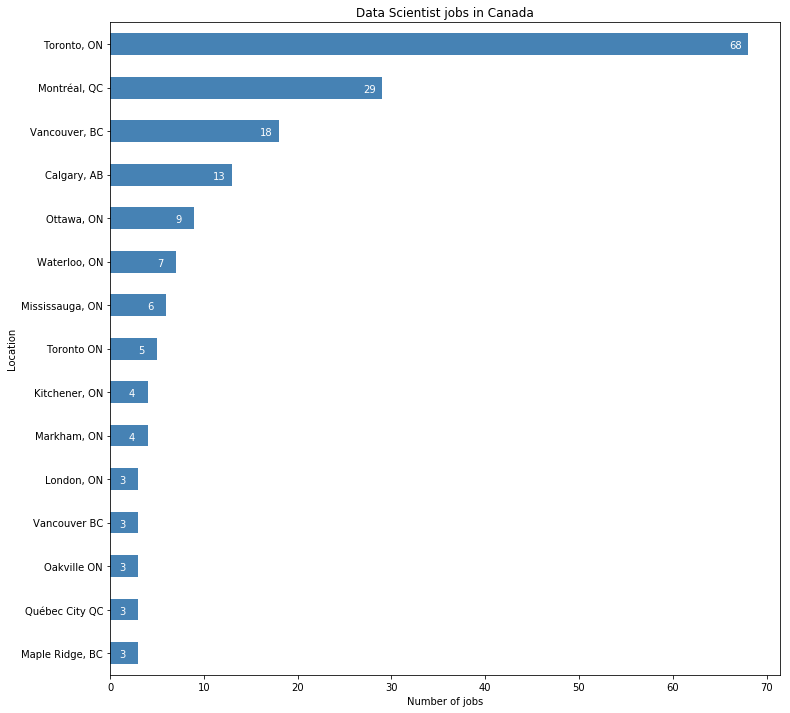

In [158]:
data13.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of jobs')
plt.title(job_title_1+' jobs in Canada')

for index, value in enumerate(data13): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 2, index - 0.10), color='white')

plt.show()

Let's plao the salary range as well.

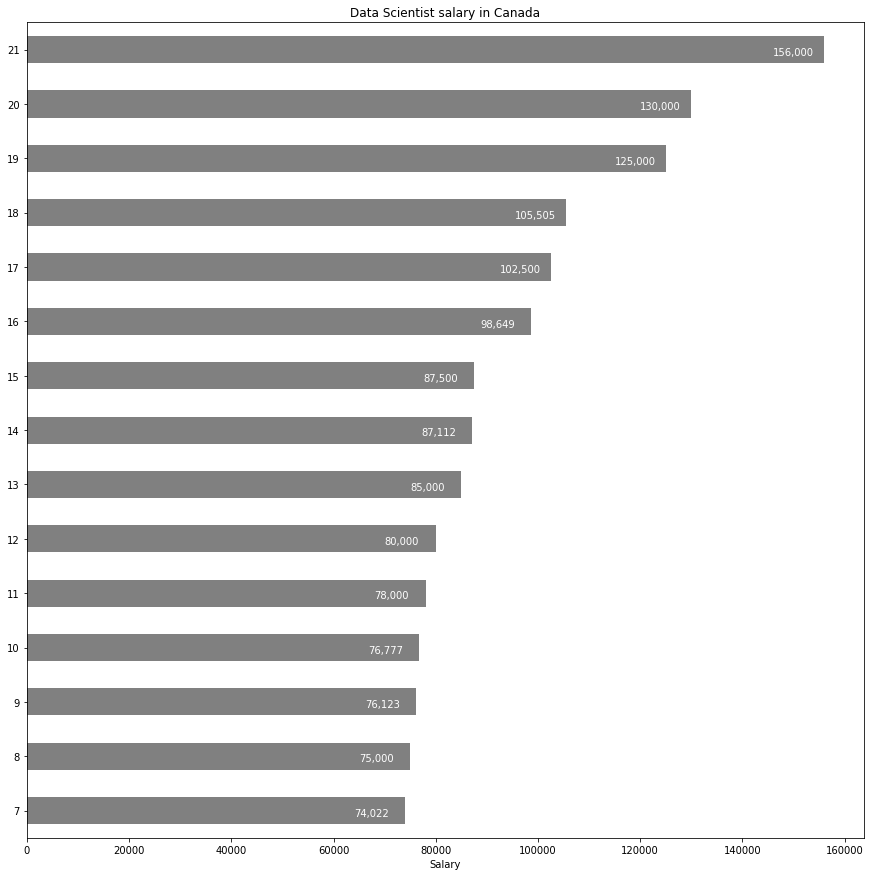

In [159]:
data_sal_all_2.plot(kind='barh', figsize=(15, 15), color='grey')
plt.xlabel('Salary')
plt.title(job_title_1+' salary in Canada')

for index, value in enumerate(data_sal_all_2): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 10000, index - 0.10), color='white')

plt.show()